# Imports

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# S&P 500 Daily Returns

C:\Users\ollie\AppData\Local\Temp\ipykernel_16940\2539843025.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^GSPC", start="2010-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Columns returned: MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])


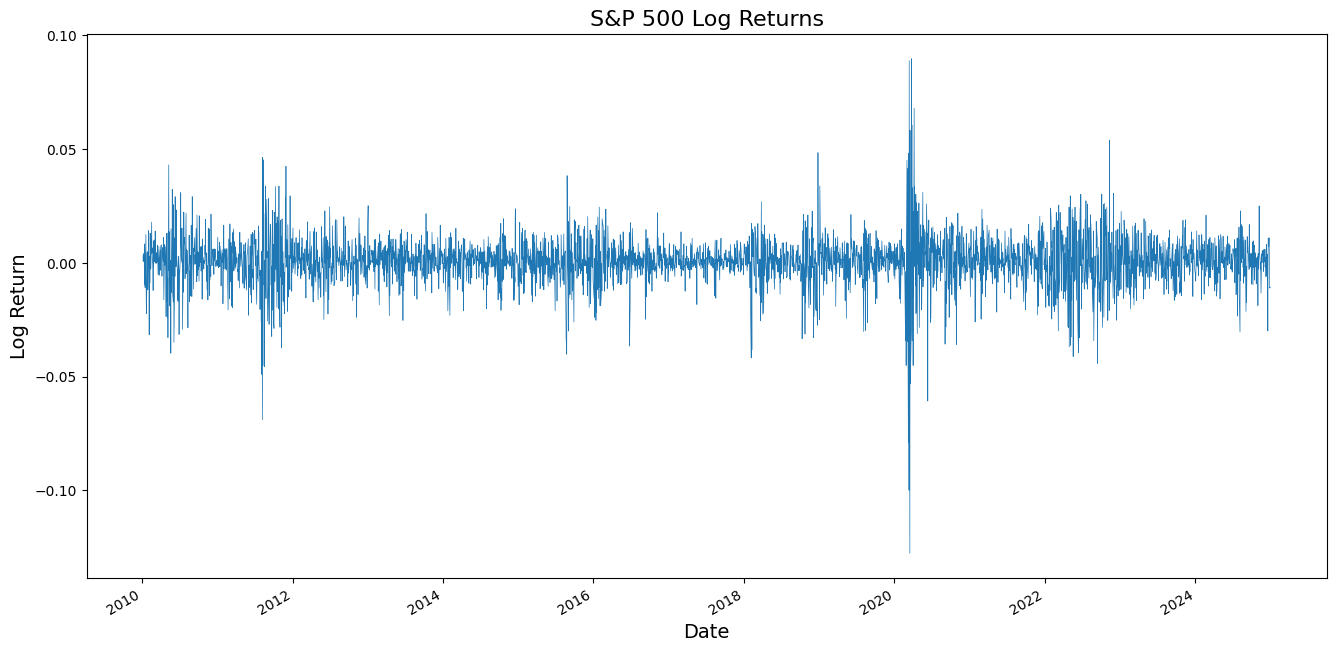

In [ ]:
# Download S&P500 data
data = yf.download("^GSPC", start="2010-01-01", end="2024-12-31")

# Check column names
print("Columns returned:", data.columns)

# If 'Adj Close' isn't present, use 'Close' instead
if 'Adj Close' in data.columns:
    price_col = 'Adj Close'
elif 'Close' in data.columns:
    price_col = 'Close'
else:
    raise ValueError("Price column not found in data")

# Compute log returns
data['LogReturns'] = np.log(data[price_col] / data[price_col].shift(1))
returns = data['LogReturns'].dropna()

# Plot log returns
returns.plot(figsize=(16, 8), linewidth=0.5)
plt.title("S&P 500 Log Returns", fontsize=16)
plt.ylabel("Log Return", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.show()
